https://www.storytellingwithdata.com/blog/2021/1/10/lets-improve-this-graph-yt9xj

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('max_columns', 50)
df = pd.read_csv('cleaned_hotel_bookings_data.csv')
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
21417,Resort Hotel,0,180,2018,October,32,4,2,4,2,0,0,Breakfast,Kota Jakarta Timur,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,96,0,0,Family,126.0,0,0,Check-Out
41452,City Hotel,1,51,2018,October,34,18,0,2,2,1,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,152.1,0,0,Canceled
43076,City Hotel,1,72,2018,December,43,18,0,2,2,0,0,No Meal,Kabupaten Pangandaran,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,117.0,0,1,Canceled


1. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)

2. Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)

3. Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)

4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)

5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)

In [2]:
def monthly_hotel_booking(df):
    df = df.copy()
    
    # aggregating the number of booking per each hotel and month
    df_agg = df.groupby(['hotel', 'arrival_date_month']).agg({
        "arrival_date_year": "nunique",
        "reservation_status": "count"
    })
    df_agg = df_agg.reset_index()
    df_agg.columns = ['hotel_type', 'month', 'no_unique_year', 'booking_count']
    
    # normalize the data by calculating average booking per each month
    df_agg['avg_booking_count'] = df_agg['booking_count'] / df_agg['no_unique_year']
    df_agg['avg_booking_count'] = df_agg['avg_booking_count'].astype(int)
    
    # map the month into integer for sorting
    month_to_int = { 
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12, 
    }
    df_agg['month_int'] = df_agg['month'].map(month_to_int)
    df_agg['month'] = df_agg['month'].apply(lambda x: str(x)[:3])
    
    # sort the dataframe by hotel type and month 
    df_agg = df_agg.sort_values(by=['hotel_type', 'month_int'])
    
    # return only neccessary columns
    columns_to_use =['hotel_type', 'month', 'avg_booking_count']
    return df_agg#[columns_to_use]

monthly_hotel_booking(df)

,hotel_type,month,no_unique_year,booking_count,avg_booking_count,month_int
4,City Hotel,Jan,2,2849,1424,1
3,City Hotel,Feb,2,2952,1476,2
7,City Hotel,Mar,2,2674,1337,3
0,City Hotel,Apr,2,3514,1757,4
8,City Hotel,May,2,4777,2388,5
6,City Hotel,Jun,2,5017,2508,6
5,City Hotel,Jul,2,5321,2660,7
1,City Hotel,Aug,2,4908,2454,8
11,City Hotel,Sep,3,5657,1885,9
10,City Hotel,Oct,3,6473,2157,10


In [3]:
df_agg = monthly_hotel_booking(df)

In [4]:
city = df_agg[df_agg['hotel_type'] == 'City Hotel']
resort = df_agg[df_agg['hotel_type'] == 'Resort Hotel']

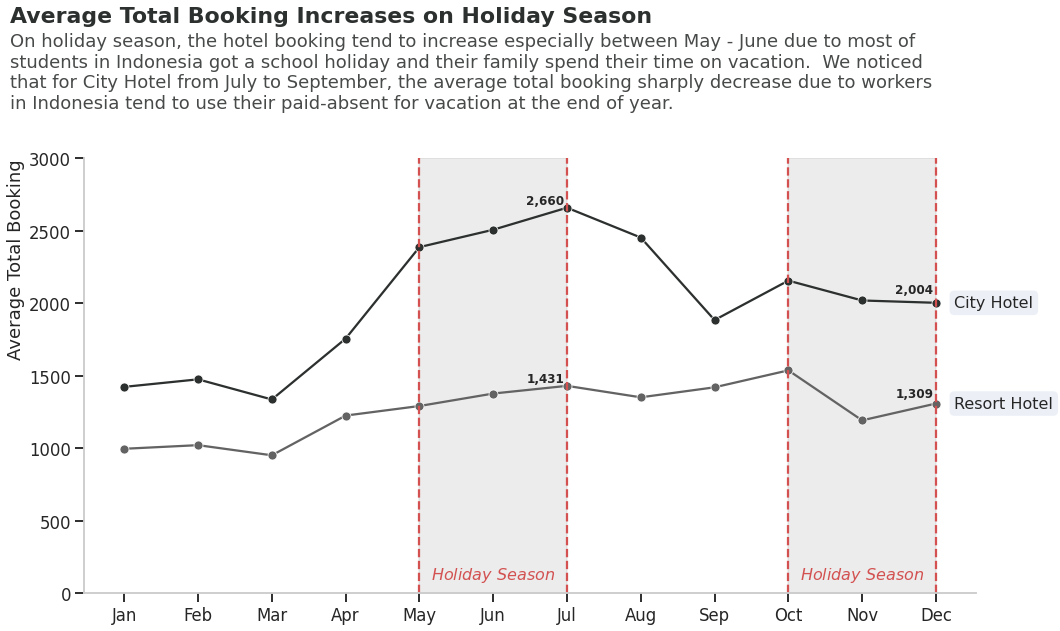

In [5]:
sns.set_theme(context="talk", style="whitegrid")

color_palette = ['#2C302E', '#474A48', '#909590', '#9AE19D', '#537A5A', '#636363']
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
#fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)

sns.lineplot(data=city, x='month', y='avg_booking_count',  marker='o', ax=ax, color=color_palette[0])
sns.lineplot(data=resort, x='month', y='avg_booking_count',  marker='o', ax=ax, color=color_palette[-1])

for position in ['top', 'right']:
    ax.spines[position].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.text(
    x=xmax - 0.3, 
    y=city['avg_booking_count'].iloc[-1], 
    s='City Hotel', 
    fontsize=16,
    va='center', 
    ha='left', 
    bbox=dict(boxstyle='round,pad=0.3', ec='none', alpha=0.1)
)

ax.text(
    x=xmax - 0.3, 
    y=resort['avg_booking_count'].iloc[-1], 
    s='Resort Hotel', 
    fontsize=16,
    va='center', 
    ha='left', 
    bbox=dict(boxstyle='round,pad=0.3', ec='none', alpha=0.1)
)

ax.text(
    x=6 - 0.55, 
    y=city['avg_booking_count'].iloc[6] + 50, 
    s='2,660', 
    fontsize=12, fontweight='bold',
    va='center', 
    ha='left', 
)

ax.text(
    x=11 - 0.55, 
    y=city['avg_booking_count'].iloc[11] + 90, 
    s='2,004', 
    fontsize=12, fontweight='bold',
    va='center', 
    ha='left', 
)

ax.text(
    x=6 - 0.55, 
    y=resort['avg_booking_count'].iloc[6] + 50, 
    s='1,431', 
    fontsize=12, fontweight='bold',
    va='center', 
    ha='left', 
)

ax.text(
    x=11 - 0.55, 
    y=resort['avg_booking_count'].iloc[11] + 70, 
    s='1,309', 
    fontsize=12, fontweight='bold',
    va='center', 
    ha='left', 
)

ax.text(
    x=xmin - 1, 
    y=ymax*1.45, 
    s='Average Total Booking Increases on Holiday Season', 
    fontsize=22,
    fontweight='bold',
    color=color_palette[0],
    va='center', 
    ha='left',
)

s = r"""
On holiday season, the hotel booking tend to increase especially between May - June due to most of   
students in Indonesia got a school holiday and their family spend their time on vacation.  We noticed   
that for City Hotel from July to September, the average total booking sharply decrease due to workers 
in Indonesia tend to use their paid-absent for vacation at the end of year.
"""
ax.text(
    x=xmin - 1, 
    y=ymax*1.31, 
    s=s, 
    fontsize=18,
    color=color_palette[1],
    va='center', 
    ha='left',
)

plt.axvline(x=4, color='#D35151', ls='--')
plt.axvline(x=6, color='#D35151', ls='--')
plt.stackplot([4, 5, 6], [3000], color=color_palette[1], alpha=0.1)
plt.text(x=4.16, y=100, s='$\it{Holiday}$ $\it{Season}$', fontsize=16, fontweight='bold', color='#D35151')

plt.axvline(x=9, color='#D35151', ls='--')
plt.axvline(x=11, color='#D35151', ls='--')
plt.stackplot([9, 10, 11], [3000], color=color_palette[1], alpha=0.1)
plt.text(x=9.16, y=100, s='$\it{Holiday}$ $\it{Season}$', fontsize=16, fontweight='bold', color='#D35151')

plt.xlabel('')
plt.ylabel('Average Total Booking', loc='top')
plt.grid(False)
plt.ylim([0, 3000])
plt.show()